# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [ ]:

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

In [72]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget


import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys
import re
import nltk
from collections import Counter

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [73]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

In [74]:
with open('stars.txt') as f:
    file_contents = f.readlines()
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/astra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
file_contents

['The Project Gutenberg eBook of Look to the Stars, by Willard Hawkins\n',
 '\n',
 'This eBook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this eBook or online at\n',
 'www.gutenberg.org. If you are not located in the United States, you\n',
 'will have to check the laws of the country where you are located before\n',
 'using this eBook.\n',
 '\n',
 'Title: Look to the Stars\n',
 '\n',
 'Author: Willard Hawkins\n',
 '\n',
 'Release Date: April 13, 2021 [eBook #65075]\n',
 '\n',
 'Language: English\n',
 '\n',
 'Character set encoding: UTF-8\n',
 '\n',
 'Produced by: Greg Weeks, Mary Meehan and the Online Distributed\n',
 '             Proofreading Team at http://www.pgdp.net\n',
 '\n',
 '*** START OF THE PROJECT GUTENBERG EBOOK LOOK TO THE STARS ***\n',
 '\n',
 '\n',


Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [80]:
stop_words = stopwords.words('english')

In [81]:
file_contents

['The Project Gutenberg eBook of Look to the Stars, by Willard Hawkins\n',
 '\n',
 'This eBook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this eBook or online at\n',
 'www.gutenberg.org. If you are not located in the United States, you\n',
 'will have to check the laws of the country where you are located before\n',
 'using this eBook.\n',
 '\n',
 'Title: Look to the Stars\n',
 '\n',
 'Author: Willard Hawkins\n',
 '\n',
 'Release Date: April 13, 2021 [eBook #65075]\n',
 '\n',
 'Language: English\n',
 '\n',
 'Character set encoding: UTF-8\n',
 '\n',
 'Produced by: Greg Weeks, Mary Meehan and the Online Distributed\n',
 '             Proofreading Team at http://www.pgdp.net\n',
 '\n',
 '*** START OF THE PROJECT GUTENBERG EBOOK LOOK TO THE STARS ***\n',
 '\n',
 '\n',


In [82]:


def preprocess(file_contents):
    result = []
    for token in gensim.utils.simple_preprocess(file_contents):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result
file_contents


['The Project Gutenberg eBook of Look to the Stars, by Willard Hawkins\n',
 '\n',
 'This eBook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this eBook or online at\n',
 'www.gutenberg.org. If you are not located in the United States, you\n',
 'will have to check the laws of the country where you are located before\n',
 'using this eBook.\n',
 '\n',
 'Title: Look to the Stars\n',
 '\n',
 'Author: Willard Hawkins\n',
 '\n',
 'Release Date: April 13, 2021 [eBook #65075]\n',
 '\n',
 'Language: English\n',
 '\n',
 'Character set encoding: UTF-8\n',
 '\n',
 'Produced by: Greg Weeks, Mary Meehan and the Online Distributed\n',
 '             Proofreading Team at http://www.pgdp.net\n',
 '\n',
 '*** START OF THE PROJECT GUTENBERG EBOOK LOOK TO THE STARS ***\n',
 '\n',
 '\n',


If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

In [87]:
dictionary={}
def calculate_frequencies(file_contents):
#     ?file_contents=file_contents.lower()
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    text=" ".join([i for i in file_contents])
    text=text.lower()
    text="".join([char for char in text if char not in punctuations])
   
    text="".join([char for char in text if char not in uninteresting_words])
    text = re.sub('[0-9]', '', text)

#     for i in text:
#         count= text.count(i)
#         dictionary.update( {i : count} )
    

    dictionary=dict(Counter(text.split()))

    cloud = wordcloud.WordCloud(max_words=1000,width=2000,height=1000)
    cloud.generate_from_frequencies(dictionary)

    return cloud.to_array()
calculate_frequencies(file_contents)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

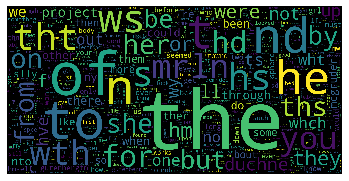

In [88]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!